In [8]:
import gzip
from collections import defaultdict
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield eval(l)

In [4]:
user_reviews = list(parse('data/australian_user_reviews.json.gz')) #game reviews
user_reviews[0]

{'user_id': '76561197970982479',
 'user_url': 'http://steamcommunity.com/profiles/76561197970982479',
 'reviews': [{'funny': '',
   'posted': 'Posted November 5, 2011.',
   'last_edited': '',
   'item_id': '1250',
   'helpful': 'No ratings yet',
   'recommend': True,
   'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'},
  {'funny': '',
   'posted': 'Posted July 15, 2011.',
   'last_edited': '',
   'item_id': '22200',
   'helpful': 'No ratings yet',
   'recommend': True,
   'review': "It's unique and worth a playthrough."},
  {'funny': '',
   'posted': 'Posted April 21, 2011.',
   'last_edited': '',
   'item_id': '43110',
   'helpful': 'No ratings yet',
   'recommend': True,
   'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this 

In [5]:
item_descriptions = list(parse('data/steam_games.json.gz')) #metadata
item_descriptions[0]

{'publisher': 'Kotoshiro',
 'genres': ['Action', 'Casual', 'Indie', 'Simulation', 'Strategy'],
 'app_name': 'Lost Summoner Kitty',
 'title': 'Lost Summoner Kitty',
 'url': 'http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/',
 'release_date': '2018-01-04',
 'tags': ['Strategy', 'Action', 'Indie', 'Casual', 'Simulation'],
 'discount_price': 4.49,
 'reviews_url': 'http://steamcommunity.com/app/761140/reviews/?browsefilter=mostrecent&p=1',
 'specs': ['Single-player'],
 'price': 4.99,
 'early_access': False,
 'id': '761140',
 'developer': 'Kotoshiro'}

In [6]:
user_item = list(parse('data/australian_users_items.json.gz')) #metadata
user_item[0]

{'user_id': '76561197970982479',
 'items_count': 277,
 'steam_id': '76561197970982479',
 'user_url': 'http://steamcommunity.com/profiles/76561197970982479',
 'items': [{'item_id': '10',
   'item_name': 'Counter-Strike',
   'playtime_forever': 6,
   'playtime_2weeks': 0},
  {'item_id': '20',
   'item_name': 'Team Fortress Classic',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '30',
   'item_name': 'Day of Defeat',
   'playtime_forever': 7,
   'playtime_2weeks': 0},
  {'item_id': '40',
   'item_name': 'Deathmatch Classic',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '50',
   'item_name': 'Half-Life: Opposing Force',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '60',
   'item_name': 'Ricochet',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '70',
   'item_name': 'Half-Life',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '130',
   'item_name': 'Half-Life: Blue Shift',
   'playtime_forever

# Analysis of the data

In [20]:
items = defaultdict(int)
genresCount = defaultdict(int)
tagsCount = defaultdict(int)
for item in item_descriptions:
    items[item.get('id', '0')] = 0
    te = item.get('tags')
    if te != None:
        for t in te:
            tagsCount[t]+=1
    ge = item.get('genres')
    if ge != None:
        for g in ge:
            genresCount[g]+=1
            

In [24]:
mostPopularTags = [(tagsCount[x], x) for x in tagsCount]
mostPopularTags.sort()
mostPopularTags.reverse()
mostPopularTags = mostPopularTags[:50]
mostPopularTags

[(17620, 'Indie'),
 (13005, 'Action'),
 (9831, 'Adventure'),
 (9739, 'Casual'),
 (7730, 'Simulation'),
 (7566, 'Strategy'),
 (5919, 'RPG'),
 (4346, 'Singleplayer'),
 (2406, 'Free to Play'),
 (2383, 'Multiplayer'),
 (2235, 'Great Soundtrack'),
 (2111, 'Puzzle'),
 (1947, 'Early Access'),
 (1945, '2D'),
 (1935, 'Atmospheric'),
 (1796, 'VR'),
 (1597, 'Sports'),
 (1449, 'Platformer'),
 (1446, 'Story Rich'),
 (1388, 'Sci-fi'),
 (1363, 'Fantasy'),
 (1332, 'Horror'),
 (1319, 'Open World'),
 (1313, 'Difficult'),
 (1303, 'Anime'),
 (1286, 'Massively Multiplayer'),
 (1241, 'Pixel Graphics'),
 (1235, 'Co-op'),
 (1234, 'Shooter'),
 (1229, 'Racing'),
 (1178, 'Female Protagonist'),
 (1117, 'Funny'),
 (1086, 'First-Person'),
 (1009, 'FPS'),
 (971, 'Sandbox'),
 (968, 'Arcade'),
 (959, 'Retro'),
 (949, 'Turn-Based'),
 (930, 'Comedy'),
 (866, 'Point & Click'),
 (864, 'Survival'),
 (794, 'Classic'),
 (773, 'Family Friendly'),
 (720, 'Space'),
 (720, 'Movie'),
 (643, 'Gore'),
 (629, 'Design & Illustration'

In [19]:
mostPopularGenres = [(genresCount[x], x) for x in genresCount]
mostPopularGenres.sort()
mostPopularGenres.reverse()
mostPopularGenres[:50]

[(15858, 'Indie'),
 (11321, 'Action'),
 (8282, 'Casual'),
 (8243, 'Adventure'),
 (6957, 'Strategy'),
 (6699, 'Simulation'),
 (5479, 'RPG'),
 (2031, 'Free to Play'),
 (1462, 'Early Access'),
 (1257, 'Sports'),
 (1108, 'Massively Multiplayer'),
 (1083, 'Racing'),
 (460, 'Design &amp; Illustration'),
 (340, 'Utilities'),
 (268, 'Web Publishing'),
 (183, 'Animation &amp; Modeling'),
 (125, 'Education'),
 (116, 'Video Production'),
 (105, 'Software Training'),
 (93, 'Audio Production'),
 (77, 'Photo Editing'),
 (7, 'Accounting')]

In [ ]:
# Data processing

In [22]:
mostPopularTagsDic = {}
for i in range(len(mostPopularTags[:50])) :
    mostPopularTagsDic[mostPopularTags[i][1]]=i

In [40]:
def featTags(d):
    out=[0]*50
    for tags in d.get('tags'):
        # print(dig)
        for top in mostPopularTagsDic:
            if top in tags:
                out[mostPopularTagsDic[top]]=1
                continue
    return out

In [ ]:
# def make_features(data):
#   features = []
#   for d in tqdm(data):

#     oneHotTags = featTags(d.get('tags'))

#     temp = []

#     temp = temp+ oneHotTags
    
#     features.append(temp)
#   return features


In [25]:
items = { i.get('id', '0'): i for i in item_descriptions }

In [31]:
no_record = 0
no_attr = 0
no_price = 0

def format_review(review):
    item = items.get(review['item_id'], None)
    
    if not item:
        # Non-existent item
        global no_record
        no_record += 1
        return None
    
    if 'tags' not in item.keys():
        # Missing attribute
        global no_attr
        no_attr += 1
        return None
    
    # date_posted = review['posted'][7:-1]
    
    # month_posted = date_posted.split(' ')[0]
    # year_posted = int(date_posted.split(' ')[-1])
    
    # # Remove old/incorrectly dated reviews
    # if year_posted < 2010:
    #     return None
    
    
    return {
        'review': review['review'],
        'tags': item['tags'],
        # 'price': item['price'],
        # 'release_date': item['release_date'],
        #  # Remove <Posted > part
        # 'date_posted': review['posted'][7:-1],
    }

In [32]:
# Create the data list
data = []
for user in user_reviews:
    for review in user['reviews']:
        data.append(format_review(review))
        
data = [d for d in data if d is not None]

In [33]:
data[0]

{'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.',
 'tags': ['FPS',
  'Zombies',
  'Co-op',
  'Survival',
  'Action',
  'Multiplayer',
  'Horror',
  'Online Co-Op',
  'Shooter',
  'Gore',
  'Team-Based',
  'First-Person',
  'Moddable',
  'Survival Horror',
  'Great Soundtrack',
  'Singleplayer',
  'Class-Based',
  'Difficult',
  'Comedy',
  'Adventure']}

In [34]:
no_record

5317

In [35]:
no_attr

2

In [37]:
len(data)

53986

# Train/Valid data split

In [72]:
#randomly shuffle the data
import random
random.shuffle(data)

data_train = data[:45000]
data_valid = data[45000:]

In [74]:
Y_train = [featTags(d) for d in data_train]
Y_valid = [featTags(d) for d in data_valid]

# baseline
## consider if there exist tag words in review

In [75]:
def baseline(d):
    # no offset term
    out=[0]*50
    review = d['review'].lower().split(' ')
    for word in review:
        # print(dig)
        if word in mostPopularTagsDic:
            out[mostPopularTagsDic[word]]=1
    return out


In [76]:
predictions = [baseline(d) for d in data_valid]

In [77]:
from sklearn import metrics
metrics.mean_squared_error(Y_valid, predictions)

0.2356599154239929

# tfidf

## Review text cleanup

In [78]:
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def clean(text):
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    import string
    table = str.maketrans('', '', punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    
    words = [w for w in words if not w in stop_words]
    stemmed = [porter.stem(word) for word in words]
    
    return ' '.join(stemmed)

In [79]:
import numpy as np
import matplotlib.pyplot as plt

plotwords = counts[:25]
plotwords.sort()
freq = [x[0] for x in plotwords]
word = [x[1] for x in plotwords]

In [80]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
    
for d in data:
    d['review'] = clean(d['review'])
    
import string
from nltk.stem.porter import *

wordCount = defaultdict(int) #for bigrams
for d in data:
    words = d['review'].split() # tokenizes
    for w in words:
        wordCount[w] += 1
        
counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

counts[:30]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhuan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(60051, 'game'),
 (17215, 'play'),
 (10830, 'get'),
 (10398, 'like'),
 (9568, 'good'),
 (9451, 'nt'),
 (9389, 'fun'),
 (8165, 'great'),
 (7013, 'one'),
 (6216, 'would'),
 (6153, 'realli'),
 (5942, 'time'),
 (5547, 'make'),
 (5374, 'best'),
 (4357, 'buy'),
 (4346, 'love'),
 (4093, 'much'),
 (4093, 'go'),
 (3986, 'even'),
 (3639, 'peopl'),
 (3605, 'want'),
 (3584, 'amaz'),
 (3488, 'de'),
 (3480, 'recommend'),
 (3478, 'hat'),
 (3464, 'still'),
 (3434, 'thing'),
 (3405, 'ever'),
 (3370, 'awesom'),
 (3281, 'stori')]

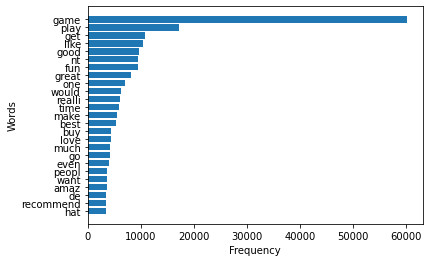

In [81]:
plt.barh(word, width=freq, align='center')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [82]:
for d in data_train:
    d['review'] = clean(d['review'])
for d in data_valid:
    d['review'] = clean(d['review'])

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf

In [84]:
vectorizer = tfidf(max_features=7000)

In [85]:
corpus = [d['review'] for d in data_train]
tfidf_result = vectorizer.fit_transform(corpus)

In [86]:
from sklearn.decomposition import PCA

In [87]:
# reduce dimensionality
pca = PCA(n_components=100)

tfidf_feat = pca.fit_transform(tfidf_result.toarray())

In [89]:
def feature(i, entry):
    feat = []
    
    # get the review tfidf data
    tfidf = tfidf_feat[i]
    
    # # one-hot encode tags
    # tag_feat = [0] * len(tags.keys())
    # for tag in entry['tags']:
    #     if tag in tags:
    #         tag_feat[tags[tag]] = 1
    
    # # one-hot encode date
    # date_feat = [0] * 6 + [0] * 12
    # date_posted = entry['date_posted']
    
    # month_posted = months[date_posted.split(' ')[0]]
    # year_posted = int(date_posted.split(' ')[-1])
    
    # date_feat[year_posted - 2010] = 1
    # date_feat[4 + month_posted] = 1
    
    # feat.extend(date_feat)
    # feat.extend(tag_feat)
    feat.extend(tfidf)
    
    return feat

In [90]:
X_train = [feature(i, x) for (i, x) in enumerate(data_train)]

In [91]:
len(X_train) == len(Y_train)

True

In [92]:
from sklearn.linear_model import LinearRegression
sk_X = np.array(X_train)
sk_Y = np.array(Y_train)

reg = LinearRegression(normalize=True).fit(sk_X, sk_Y)

reg.score(sk_X, sk_Y)

0.050401403731877625

In [93]:
X_valid = [feature(i, x) for (i, x) in enumerate(data_valid)]

In [94]:
predictions = reg.predict(X_valid)

In [95]:
metrics.mean_squared_error(Y_valid, predictions)


0.14012214981277102

In [96]:
metrics.r2_score(Y_valid, predictions)

-0.051723427092488165